In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [5]:
# Load the dataset
file_path = '../Data/Copy of Week2_challenge_data_source(CSV).csv'  # Update this with your dataset path


data = pd.read_csv(file_path)

In [6]:
from scripts.user_overview_analysis import UserOverviewAnalysis

user_overview_analysis = UserOverviewAnalysis(file_path)
user_overview_analysis.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


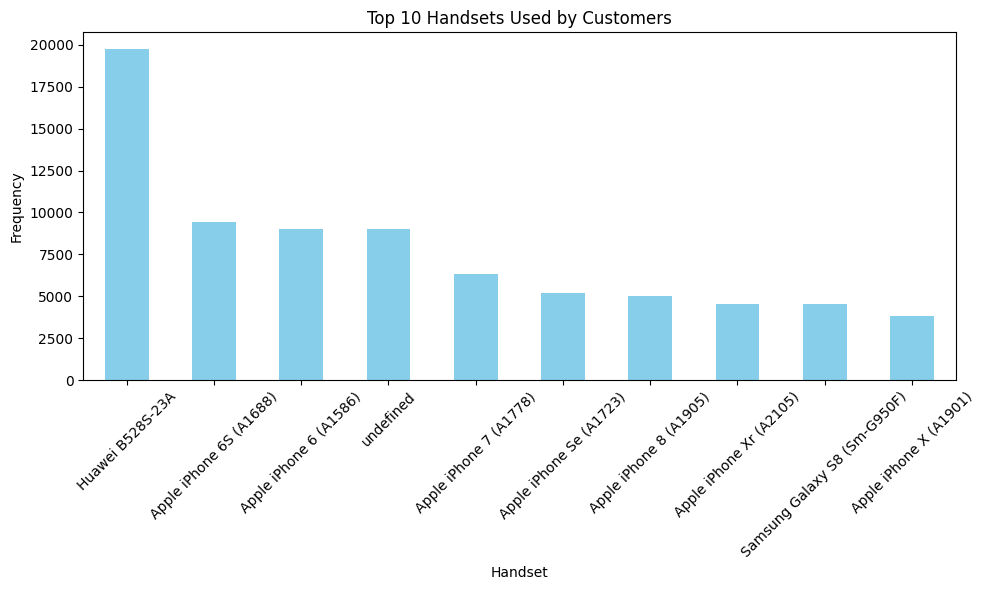

In [7]:
user_overview_analysis.top_10_Handset()


Top 3 Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


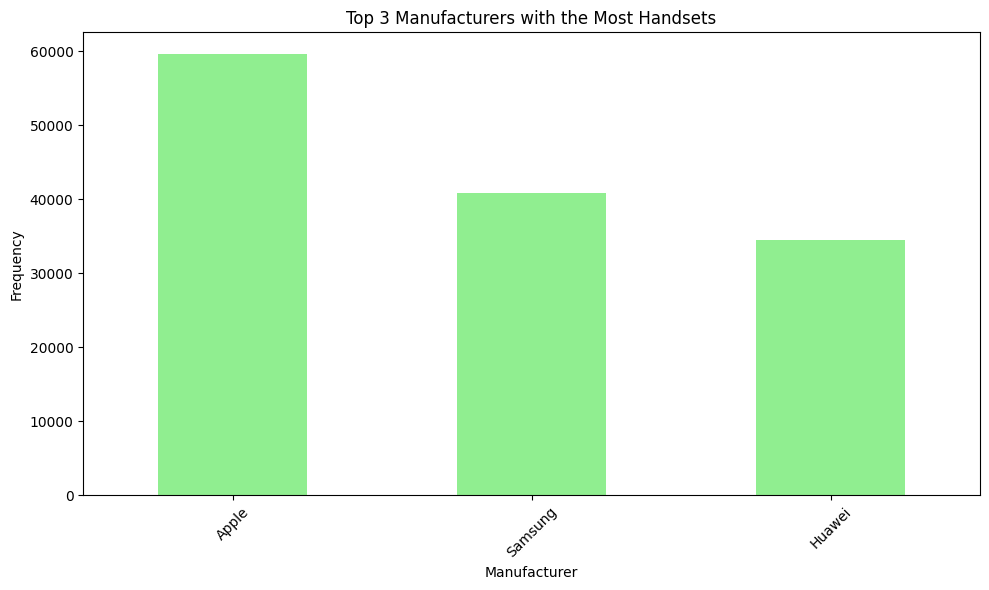

Index(['Apple', 'Samsung', 'Huawei'], dtype='object', name='Handset Manufacturer')

In [8]:
user_overview_analysis.top_3_manufacturers()


Top 3 Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


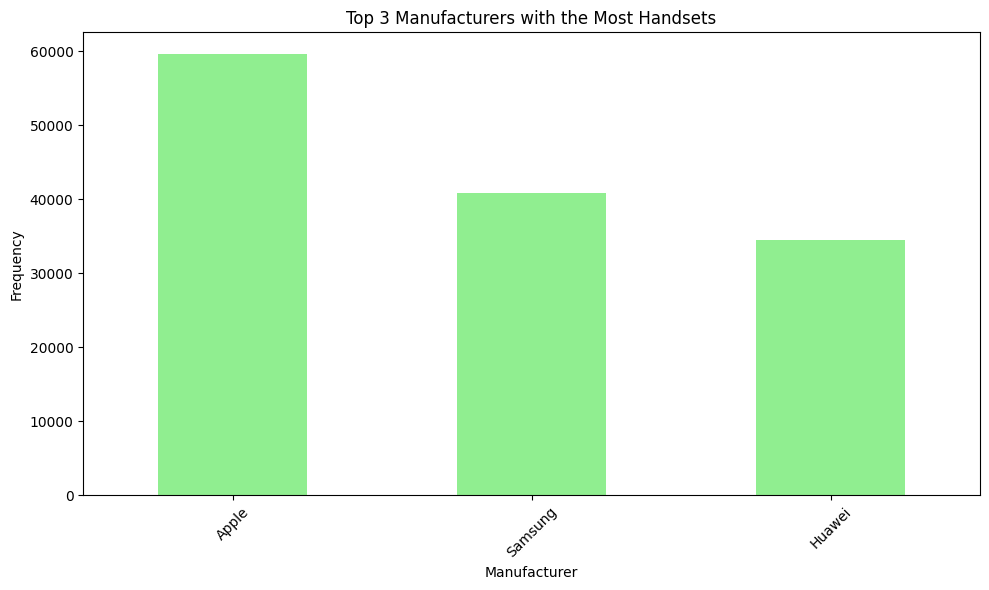


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


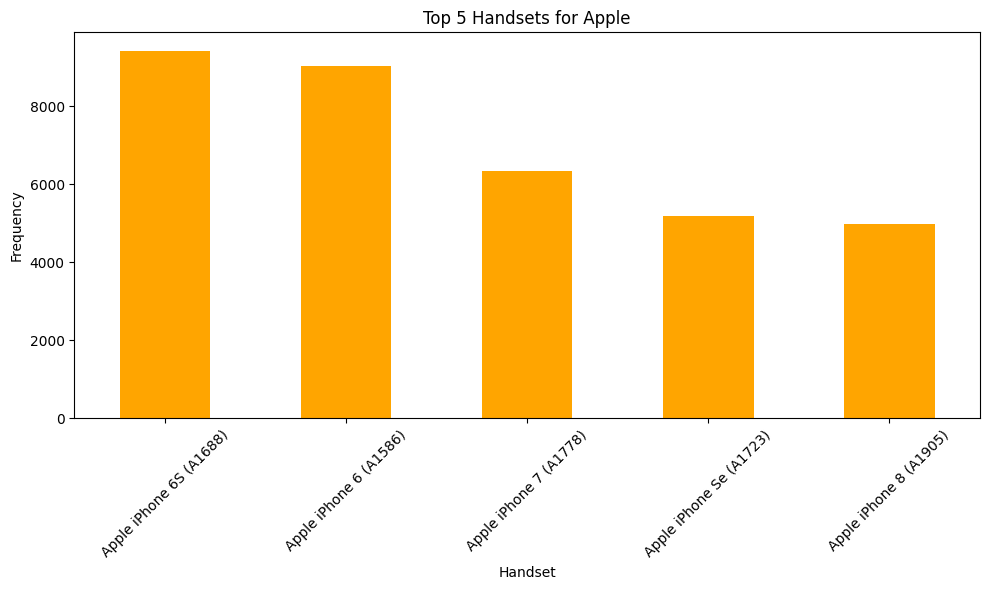


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


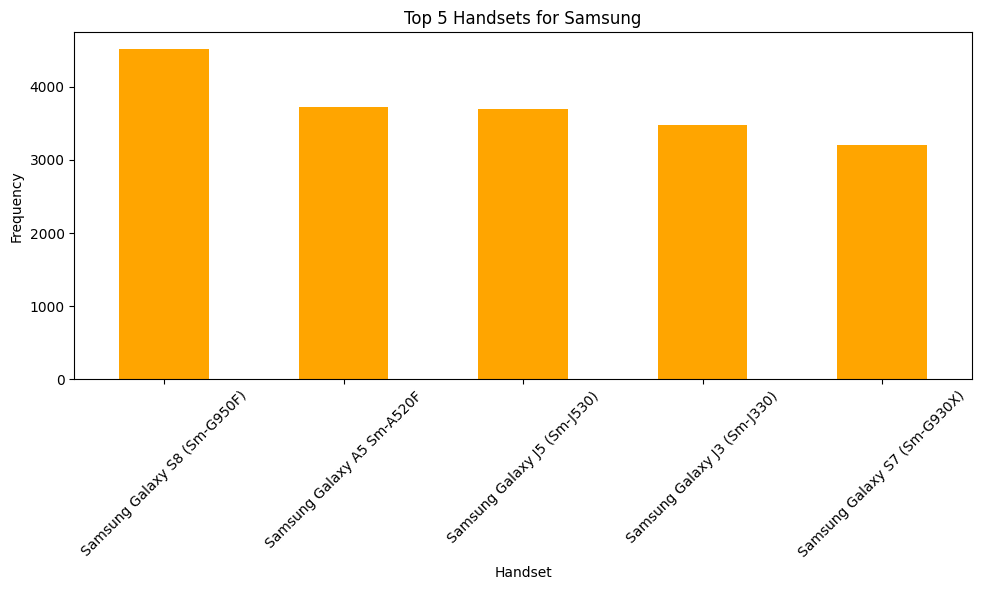


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


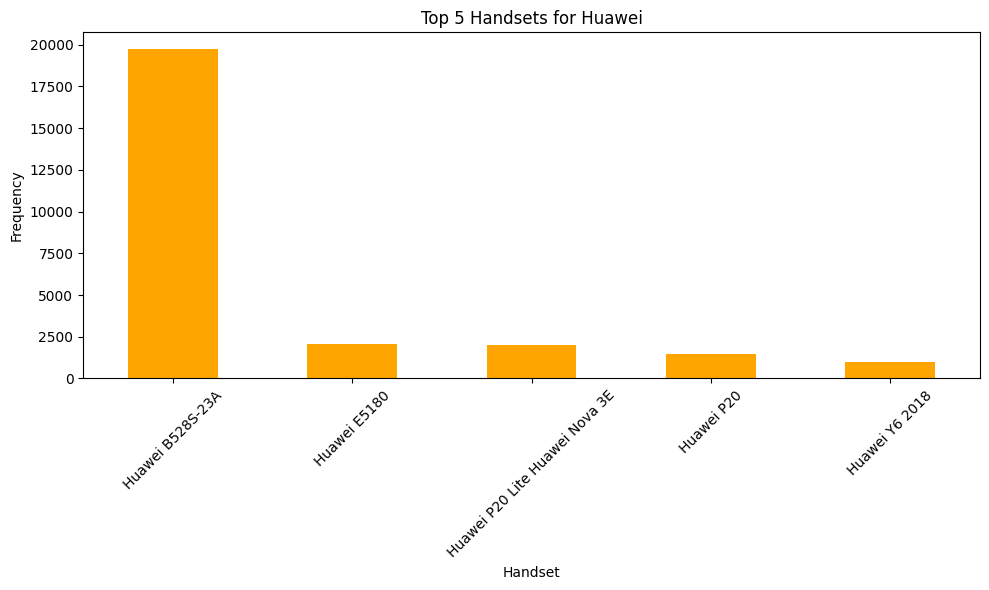

In [9]:
user_overview_analysis.top_5_handset_top_3_manufacturers()

In [26]:
user_overview_analysis.aggregate_per_user()



Aggregated Data Sample:


,IMSI,number_of_xdr_sessions,total_duration,total_download,total_upload,total_data_volume
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1.391536e+08
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,2.321240e+08
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,8.517164e+07
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,4.265016e+08
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,1.033092e+09
...,...,...,...,...,...,...
107260,2.082099e+14,1,127367.0,688815403.0,33888182.0,7.227036e+08
107261,2.082099e+14,1,168543.0,451173021.0,44692550.0,4.958656e+08
107262,2.082099e+14,1,86399.0,307825104.0,30355487.0,3.381806e+08
107263,2.082522e+14,1,56613.0,800629358.0,45083854.0,8.457132e+08


In [ ]:
user_overview_analysis.handle_missing_values()


Aggregated Data Sample:


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_34419/2376396972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")


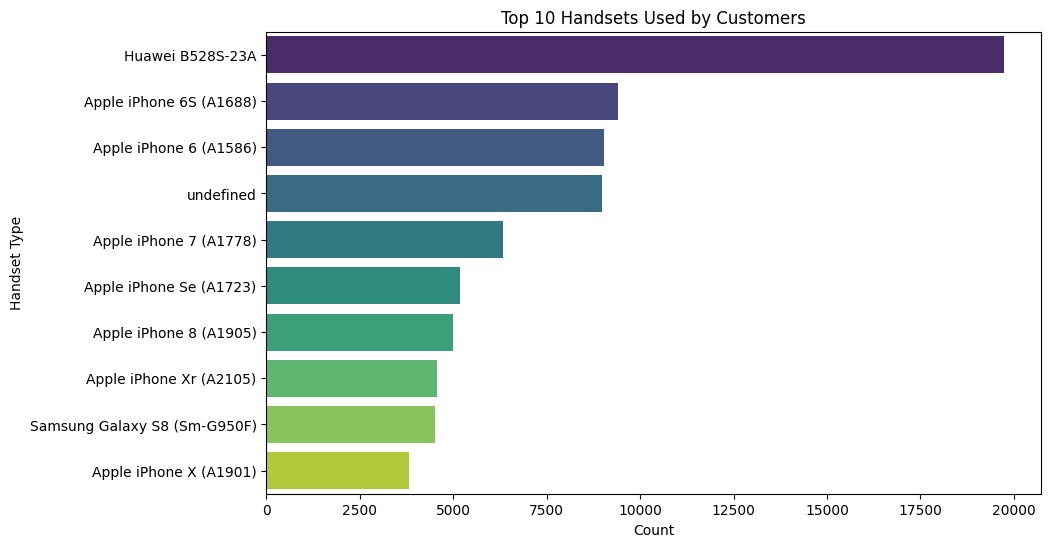

In [11]:
# Top 10 handsets
top_10_handsets = data['Handset Type'].value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_34419/2402987955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="mako")


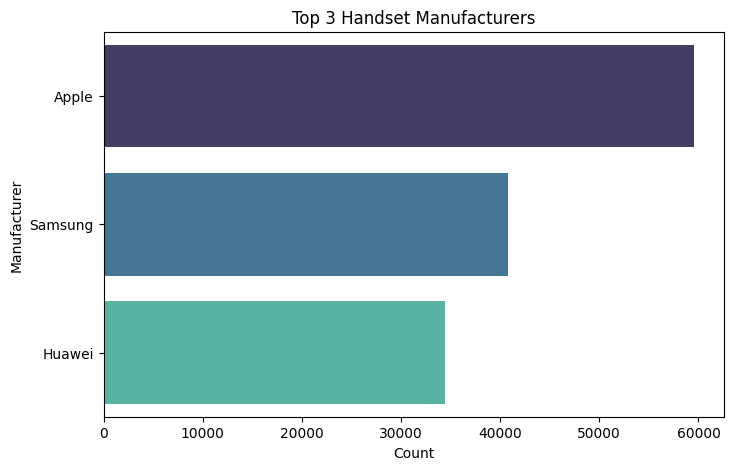

In [12]:
# Top 3 manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="mako")
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()


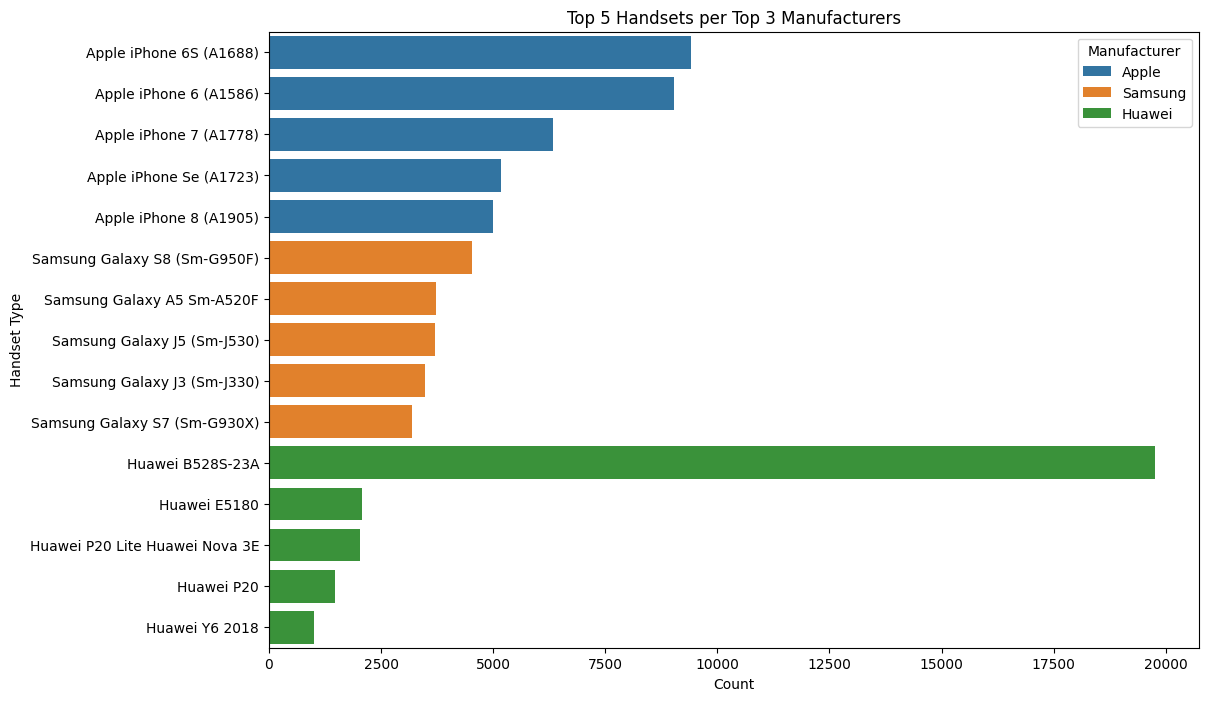

In [13]:
# Top 3 manufacturers
top_3 = top_3_manufacturers.index

# Top 5 handsets per manufacturer
top_5_per_manufacturer = {}
for manufacturer in top_3:
    top_5_per_manufacturer[manufacturer] = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

# Visualization
plt.figure(figsize=(12, 8))
for manufacturer, handsets in top_5_per_manufacturer.items():
    sns.barplot(x=handsets.values, y=handsets.index, label=manufacturer)

plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.legend(title="Manufacturer")
plt.show()


In [14]:
# Aggregate per user
user_behavior = data.groupby('IMSI').agg({
    'Bearer Id': 'count',                 # Number of xDR sessions
    'Dur. (ms)': 'sum',                   # Total session duration
    'Total DL (Bytes)': 'sum',            # Total Download
    'Total UL (Bytes)': 'sum',            # Total Upload
    'Social Media DL (Bytes)': 'sum',     # Social Media Download
    'Social Media UL (Bytes)': 'sum',     # Social Media Upload
    'Youtube DL (Bytes)': 'sum',          # YouTube Download
    'Youtube UL (Bytes)': 'sum',          # YouTube Upload
    'Netflix DL (Bytes)': 'sum',          # Netflix Download
    'Netflix UL (Bytes)': 'sum',          # Netflix Upload
    'Google DL (Bytes)': 'sum',           # Google Download
    'Google UL (Bytes)': 'sum',           # Google Upload
    'Email DL (Bytes)': 'sum',            # Email Download
    'Email UL (Bytes)': 'sum',            # Email Upload
    'Gaming DL (Bytes)': 'sum',           # Gaming Download
    'Gaming UL (Bytes)': 'sum',           # Gaming Upload
    'Other DL (Bytes)': 'sum',            # Other Download
    'Other UL (Bytes)': 'sum'             # Other Upload
}).reset_index()

# Add total data volume
user_behavior['Total Data Volume (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
print(user_behavior.head())


           IMSI  Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0  2.040471e+14          1   869844.0        78697597.0        60456049.0   
1  2.040808e+14          1   877385.0       194828056.0        37295915.0   
2  2.082001e+14          1    86019.0        31376981.0        53794658.0   
3  2.082001e+14          1    86254.0       392918313.0        33583272.0   
4  2.082001e+14          2   573923.0       961767023.0        71325004.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Youtube DL (Bytes)  \
0                1500145.0                  45943.0          18980320.0   
1                 668596.0                  46628.0           9839889.0   
2                3073697.0                  49084.0           5556563.0   
3                2542767.0                  34337.0          22414714.0   
4                3326811.0                  99905.0           4046597.0   

   Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0          21960390.0

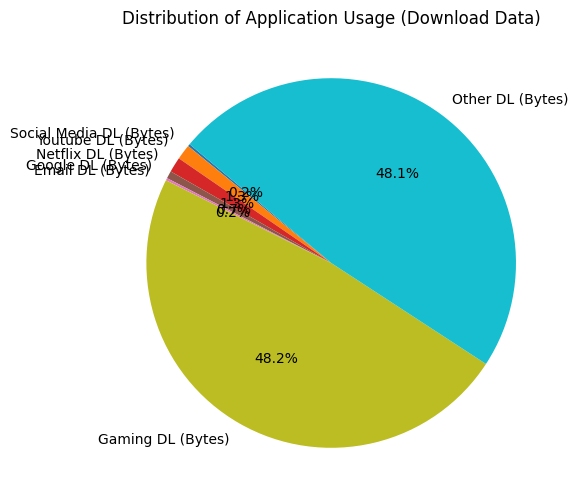

In [15]:
# Summarize application usage
app_usage = user_behavior[['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
                           'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].sum()

# Visualization
plt.figure(figsize=(10, 6))
app_usage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title('Distribution of Application Usage (Download Data)')
plt.ylabel('')
plt.show()


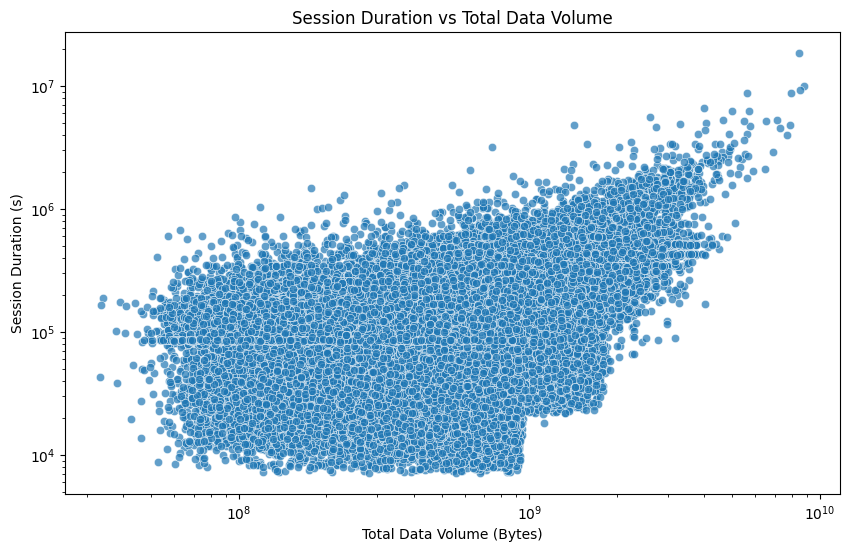

In [16]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_behavior, x='Total Data Volume (Bytes)', y='Dur. (ms)', alpha=0.7)
plt.title('Session Duration vs Total Data Volume')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Session Duration (s)')
plt.xscale('log')
plt.yscale('log')
plt.show()



In [17]:
# Data overview
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Treat missing values for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify no missing values remain
print("Remaining Missing Values:\n", data.isnull().sum())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [18]:
# Function to replace outliers with the column mean
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: column.mean() if x < lower_bound or x > upper_bound else x)

# Replace outliers for all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].apply(replace_outliers_with_mean)

# Verify that no extreme outliers remain
print(data[numeric_columns].describe())


          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501433e+10  4.847455e+13        67.089326   
std    3.310759e+08   3.052711e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365182e+10  3.5462

In [19]:
# Calculate total duration per user
data['Total Duration (s)'] = data['Dur. (ms)'] / 1000  # Convert ms to seconds

# Segment into decile classes, dropping duplicate edges
data['Decile Class'] = pd.qcut(data['Total Duration (s)'], 10, labels=range(1, 11), duplicates="drop")

# Compute total data (DL + UL) per decile
decile_summary = data.groupby('Decile Class').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
})
decile_summary['Total Data (Bytes)'] = decile_summary['Total DL (Bytes)'] + decile_summary['Total UL (Bytes)']

print(decile_summary)

# Ensure all necessary columns are present and numeric
numeric_columns = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total duration per user
data['Total Duration (s)'] = data['Dur. (ms)'] / 1000  # Convert ms to seconds

# Segment into decile classes, dropping duplicate edges
data['Decile Class'] = pd.qcut(data['Total Duration (s)'], 10, labels=range(1, 11), duplicates="drop")

# Compute total data (DL + UL) per decile
decile_summary = data.groupby('Decile Class').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
})
decile_summary['Total Data (Bytes)'] = decile_summary['Total DL (Bytes)'] + decile_summary['Total UL (Bytes)']

print(decile_summary)



ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
# Basic metrics for quantitative variables
metrics = data[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max']).T
print(metrics)


In [ ]:
# Relationship between applications and total data
apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

for app in apps:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=app, y='Total DL (Bytes)')
    plt.title(f'{app} vs Total DL Data')
    plt.xlabel(app)
    plt.ylabel('Total DL Data')
    plt.show()



In [ ]:
# Correlation matrix
selected_apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
correlation_matrix = data[selected_apps].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_apps])

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)


In [ ]:
data.columns

In [ ]:
# Aggregate engagement metrics per customer
engagement_metrics = data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                # Session frequency
    'Dur. (ms)': 'sum',                  # Total session duration
    'Total DL (Bytes)': 'sum',           # Total download
    'Total UL (Bytes)': 'sum'            # Total upload
}).rename(columns={
    'Bearer Id': 'Session Frequency',
    'Dur. (ms)': 'Total Duration (ms)',
    'Total DL (Bytes)': 'Total Download (Bytes)',
    'Total UL (Bytes)': 'Total Upload (Bytes)'
})

# Add Total Traffic column
engagement_metrics['Total Traffic (Bytes)'] = (
    engagement_metrics['Total Download (Bytes)'] + engagement_metrics['Total Upload (Bytes)']
)

# Report top 10 customers per engagement metric
top_10_frequency = engagement_metrics.sort_values('Session Frequency', ascending=False).head(10)
top_10_duration = engagement_metrics.sort_values('Total Duration (ms)', ascending=False).head(10)
top_10_traffic = engagement_metrics.sort_values('Total Traffic (Bytes)', ascending=False).head(10)

print("Top 10 customers by session frequency:\n", top_10_frequency)
print("Top 10 customers by total duration:\n", top_10_duration)
print("Top 10 customers by total traffic:\n", top_10_traffic)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(
    engagement_metrics[['Session Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']]
)

# Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute cluster statistics
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})
print(cluster_stats)


In [ ]:
# Compute within-cluster sum of squares (WCSS) for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Define application categories
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Compute total traffic for each application and add to the dataset
for app in applications:
    data[f'{app} Traffic (Bytes)'] = (
        data[f'{app} DL (Bytes)'] + data[f'{app} UL (Bytes)']
    )

# Aggregate total traffic per customer for each application
app_traffic = data.groupby('MSISDN/Number')[
    [f'{app} Traffic (Bytes)' for app in applications]
].sum()

# Identify top 10 users for each application
top_users_per_app = {
    app: app_traffic.sort_values(f'{app} Traffic (Bytes)', ascending=False).head(10)
    for app in applications
}

# Display top 10 users for each application
for app, users in top_users_per_app.items():
    print(f"\nTop 10 most engaged users for {app} Traffic (Bytes):\n")
    print(users)


In [ ]:
# Sum traffic per application
app_totals = app_traffic.sum().sort_values(ascending=False)

# Top 3 applications
top_3_apps = app_totals.head(3)

# Bar plot
plt.figure(figsize=(8, 6))
top_3_apps.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Top 3 Most Used Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.show()


In [ ]:
import pandas as pd

# Treat missing values (replace with mean for numeric and mode for categorical variables)
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
            'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
            'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    data[col].fillna(data[col].mean(), inplace=True)

data['Handset Type'].fillna(data['Handset Type'].mode()[0], inplace=True)

# Aggregate metrics per customer
user_experience = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most common handset type
}).reset_index()

# Rename columns for better clarity
user_experience.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg TCP Retransmission DL (Bytes)',
    'TCP UL Retrans. Vol (Bytes)': 'Avg TCP Retransmission UL (Bytes)',
    'Avg RTT DL (ms)': 'Avg RTT DL (ms)',
    'Avg RTT UL (ms)': 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)': 'Avg Throughput DL (kbps)',
    'Avg Bearer TP UL (kbps)': 'Avg Throughput UL (kbps)'
}, inplace=True)

print("Aggregated User Experience Metrics (Sample):\n", user_experience.head())


In [ ]:
# Function to calculate top, bottom, and most frequent values
def analyze_metric(metric, data):
    top_10 = data[metric].nlargest(10)
    bottom_10 = data[metric].nsmallest(10)
    most_frequent = data[metric].value_counts().head(10)
    return top_10, bottom_10, most_frequent

# Metrics to analyze
metrics = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
           'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Analyze each metric
for metric in metrics:
    print(f"\nAnalysis for {metric}:\n")
    top_10, bottom_10, most_frequent = analyze_metric(metric, data)
    
    print("Top 10 Values:")
    print(top_10)
    print("\nBottom 10 Values:")
    print(bottom_10)
    print("\nMost Frequent Values:")
    print(most_frequent)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average throughput and TCP retransmission per handset type
handset_metrics = data.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

# Rename columns for clarity
handset_metrics.rename(columns={
    'Avg Bearer TP DL (kbps)': 'Avg Throughput DL (kbps)',
    'Avg Bearer TP UL (kbps)': 'Avg Throughput UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)': 'Avg TCP Retransmission DL (Bytes)',
    'TCP UL Retrans. Vol (Bytes)': 'Avg TCP Retransmission UL (Bytes)'
}, inplace=True)

# Distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=handset_metrics.sort_values('Avg Throughput DL (kbps)', ascending=False),
    x='Avg Throughput DL (kbps)',
    y='Handset Type',
    palette='viridis'
)
plt.title('Distribution of Average Throughput (DL) per Handset Type')
plt.xlabel('Average Throughput (DL) in kbps')
plt.ylabel('Handset Type')
plt.show()

# Average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=handset_metrics.sort_values('Avg TCP Retransmission DL (Bytes)', ascending=False),
    x='Avg TCP Retransmission DL (Bytes)',
    y='Handset Type',
    palette='plasma'
)
plt.title('Average TCP Retransmission (DL) per Handset Type')
plt.xlabel('Average TCP Retransmission (DL) in Bytes')
plt.ylabel('Handset Type')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select relevant metrics
experience_metrics = data[[
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'
]]

# Normalize the metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(experience_metrics)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Experience Cluster'] = kmeans.fit_predict(normalized_metrics)

# Analyze cluster characteristics
cluster_summary = data.groupby('Experience Cluster').agg({
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

print("Cluster Summary:\n", cluster_summary)

# Plot cluster distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Experience Cluster', palette='Set2')
plt.title('Number of Users per Experience Cluster')
plt.xlabel('Experience Cluster')
plt.ylabel('Number of Users')
plt.show()
